In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

sns.set_palette("muted")

# SEA LEVEL VS TEMP ANALYSIS

In [3]:
data3 = pd.read_csv("data3.txt",sep="\t")
data3.columns = ['Year','seaLvl','Temp']
data3["Year"] = pd.to_datetime(data3["Year"],format='%Y', errors='ignore')
data3.info()
data3.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    30 non-null     datetime64[ns]
 1   seaLvl  30 non-null     float64       
 2   Temp    30 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 848.0 bytes


,Year,seaLvl,Temp
0,1993-01-01,0.0,0.32
1,1994-01-01,7.3,0.43
2,1995-01-01,12.3,0.49
3,1996-01-01,10.7,0.37
4,1997-01-01,12.1,0.56


In [4]:
data4 = pd.read_csv("data4.txt",sep="\t")
data4.columns = ['Year','M_Temp']
data4["Year"] = pd.to_datetime(data4["Year"],format='%Y%m', errors='ignore')
data4.info()
data4.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    360 non-null    datetime64[ns]
 1   M_Temp  360 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


,Year,M_Temp
0,1993-01-01,0.34
1,1993-02-01,0.39
2,1993-03-01,0.38
3,1993-04-01,0.36
4,1993-05-01,0.31


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


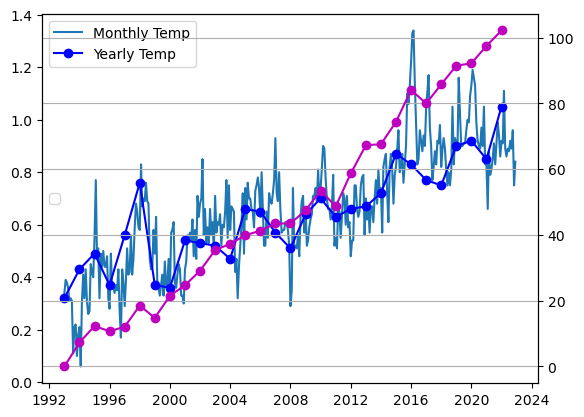

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data4["Year"], data4["M_Temp"])
ax1.plot(data3["Year"],data3["Temp"],'bo-')
ax2.plot(data3["Year"],data3["seaLvl"],"mo-")
plt.grid()
ax1.legend(['Monthly Temp', 'Yearly Temp'])
ax2.legend("SeaLevel")
plt.legend(loc='center left')


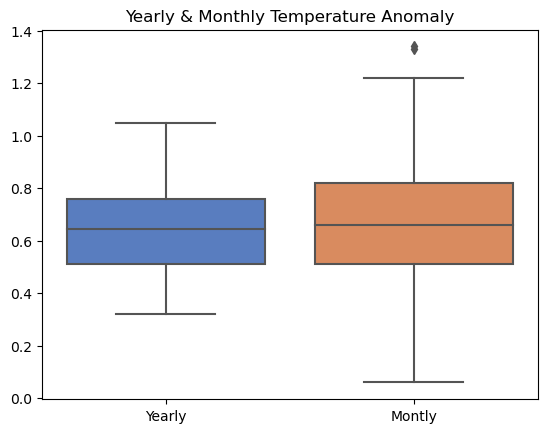

In [17]:
x = []
x.append(data3["Temp"].to_list())
x.append(data4["M_Temp"].to_list())
sns.boxplot(x)
plt.xticks([0,1], ["Yearly","Montly"])
plt.title("Yearly & Monthly Temperature Anomaly")
plt.show()

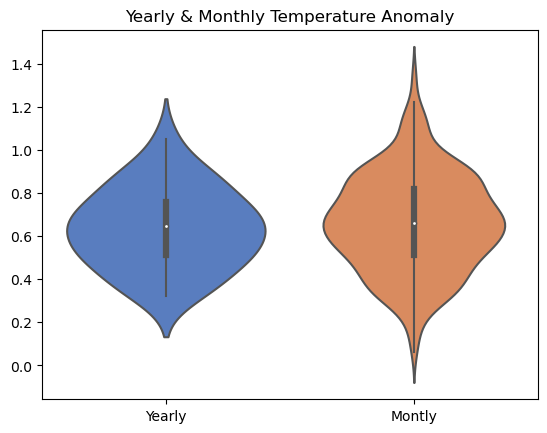

In [18]:
x = []
x.append(data3["Temp"].to_list())
x.append(data4["M_Temp"].to_list())
sns.violinplot(x)
plt.xticks([0,1], ["Yearly","Montly"])
plt.title("Yearly & Monthly Temperature Anomaly")
plt.show()

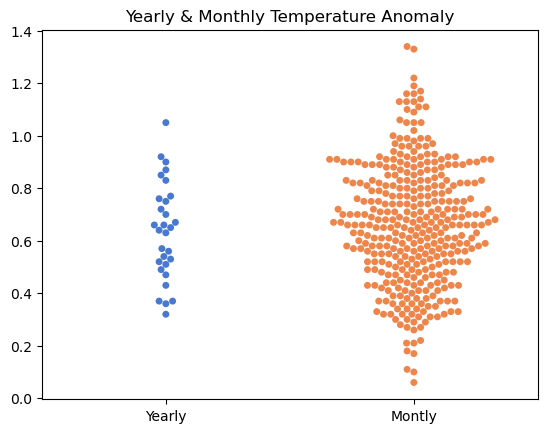

In [19]:
x = []
x.append(data3["Temp"].to_list())
x.append(data4["M_Temp"].to_list())
sns.swarmplot(x)
plt.xticks([0,1], ["Yearly","Montly"])
plt.title("Yearly & Monthly Temperature Anomaly")
plt.show()

In [24]:
# 95% --> k =  1.65
x_bar = data4["M_Temp"].mean()
cnt = data4["M_Temp"].shape[0]
k = 1.65
se = data4["M_Temp"].std() / (cnt**0.5)

print("Monthly with 360 samples TempAno")
print(f"{x_bar - k*se} ~ {x_bar + k*se}")

Monthly with 360 samples TempAno
0.6428729811175998 ~ 0.6821825744379556


In [25]:
# 95% --> k =  1.65
x_bar = data3["Temp"].mean()
cnt = data3["Temp"].shape[0]
k = 1.65
se = data3["Temp"].std() / (cnt**0.5)

print("Yearly 30 samples TempAno")
print(f"{x_bar - k*se} ~ {x_bar + k*se}")

Yearly 30 samples TempAno
0.5800423565198404 ~ 0.6912909768134933


In [26]:
# 95% --> k =  1.65
x_bar = data3["seaLvl"].mean()
cnt = data3["seaLvl"].shape[0]
k = 1.65
se = data3["seaLvl"].std() / (cnt**0.5)

print("Yearly 30 samples SeaLevel")
print(f"{x_bar - k*se} ~ {x_bar + k*se}")

Yearly 30 samples SeaLevel
38.989772769354786 ~ 57.203560563978556


## Regression

In [27]:
x3 = data3["Temp"].values
x_matrix3 = x3.reshape(-1,1)
y3 = data3["seaLvl"].values
coef3, intercept3, r_value3, p_value3, std_err3 = sp.stats.linregress(x3,y3)
coef3, intercept3, r_value3, p_value3, std_err3

(145.34564309337503,
 -44.294713793022076,
 0.8877616475033538,
 6.132137361869493e-11,
 14.241995494415521)

In [29]:
print("score:" , r_value3)
print("coef:",coef3)
print("intercept:",intercept3)

yhat3 = intercept3  + coef3*x_matrix3
eqn3 = "{:.2f} + {:.2f} x TempAno".format(intercept3, coef3)
eqn3

score: 0.8877616475033538
coef: 145.34564309337503
intercept: -44.294713793022076


'-44.29 + 145.35 x TempAno'

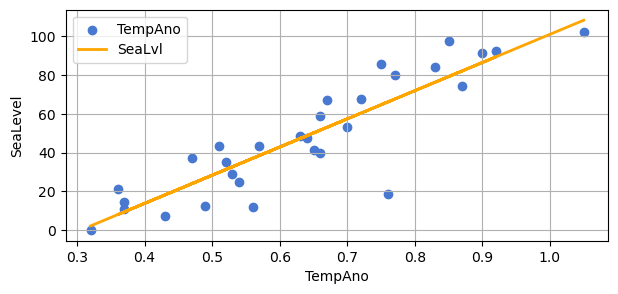

In [32]:
plt.subplots(figsize=(7,3))
plt.scatter(x3,y3)
plt.plot(x3, yhat3, lw=2, c='orange')
plt.xlabel('TempAno')
plt.ylabel('SeaLevel')
plt.legend(["TempAno","SeaLvl"])
plt.grid()
plt.show()

In [33]:
t_score3 = coef3/std_err3
t_score3

10.205426841369738

In [34]:
f"P value so low {p_value3} < 0.05. So, reject H0"

'P value so low 6.132137361869493e-11 < 0.05. So, reject H0'